# DPI and figsize

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from manim import *
config.media_embed = True

Manim Community v0.17.1

(-0.5, 399.5, 399.5, -0.5)

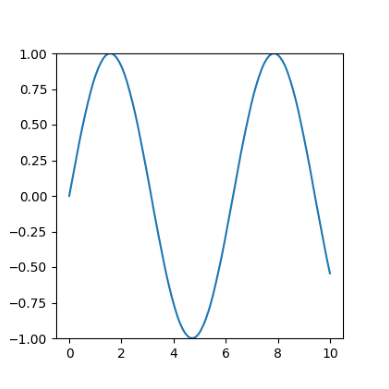

In [2]:
x = np.linspace(0, 10, 100)

def make_plot(dpi, my_fig_size):
    fig, ax = plt.subplots(figsize=(my_fig_size, my_fig_size), dpi=dpi)
    ax.plot(x, np.sin(x))
    ax.set_ylim(-1, 1)
    fig.canvas.draw()
    img = np.array(fig.canvas.buffer_rgba())
    plt.close(fig)
    return img

def make_mobject(dpi, my_fig_size, position= 3*LEFT):
    array = make_plot(dpi, my_fig_size)
    img = ImageMobject(array)
    img.shift(position)
    s =f"{my_fig_size:.1f}"
    annoA=Text(f"fig_size = ({s}, {s})\n"
                f"{dpi=:.0f}" , color=BLACK).to_edge(UP).scale(0.4)
    all = Group(img,annoA.next_to(img,UP))
    return all

plt.imshow(make_plot(100, 4))
plt.axis("off")

In [3]:
class Example(Scene):
    def construct(self):
        self.camera.background_color = BLUE_A
        fig_size_tracker = ValueTracker(4)  # for figsize = (4,4)
        dpi_tracker = ValueTracker(100) # for dpi = 100

        imageA = Group()
        self.add(imageA)

        def update_imageA(mob):
            if len(mob.submobjects) > 0: # can this be removed somehow?
                mob.remove(mob.submobjects[-1])
            mob.add(make_mobject(100, fig_size_tracker.get_value(), position= 3*LEFT))

        imageA.add_updater(update_imageA)

        imageB = Group()
        self.add(imageB)

        def update_imageB(mob):
            if len(mob.submobjects) > 0:
                mob.remove(mob.submobjects[-1])
            mob.add(make_mobject(dpi_tracker.get_value(), 4, position= 3*RIGHT))

        imageB.add_updater(update_imageB)


        self.play(dpi_tracker.animate.set_value(200),fig_size_tracker.animate.set_value(8), run_time=1)
        imageA.add_updater(lambda x,dt: x) # why is this line needed? 
        self.wait()
        dpi_tracker.set_value(175)
        fig_size_tracker.set_value(7)
        self.wait()
        dpi_tracker.set_value(150)
        fig_size_tracker.set_value(6)
        self.wait()
        dpi_tracker.set_value(125)
        fig_size_tracker.set_value(5)
        self.wait()
        dpi_tracker.set_value(100)
        fig_size_tracker.set_value(4)
        self.wait()



%manim -v WARNING -qh --disable_caching --progress_bar None Example

In [ ]:
# class Example(Scene):  # this syntax would be amazing, but is not working.
#     def construct(self):
#         fig_size_tracker = ValueTracker(4)  # for figsize = (4,4)
#         dpi_tracker = ValueTracker(100) # for dpi = 100

#         imageA = make_mobject(100, fig_size_tracker.get_value(), position=3*LEFT) 
#         self.add(imageA)

#         def update_imageA(mob):
#             new_mob =make_mobject(100, fig_size_tracker.get_value(), position=3*LEFT)
#             mob.become(new_mob)

#         imageA.add_updater(update_imageA)
#         self.play(fig_size_tracker.animate.set_value(6), run_time=1)
#         self.wait()

# %manim -v WARNING -qh --disable_caching --progress_bar None Example

In [ ]:
# for future: this annotates the frame
# pyFrame = config["pixel_height"]  # 1080 default
# pxFrame = config["pixel_width"]  # 1920 #default
# frame_width = config["frame_width"]
# frame_height = config["frame_height"]
# d1 = Line(frame_width * LEFT / 2, frame_width * RIGHT / 2).to_edge(DOWN)
# d2 = Line(frame_height * UP / 2, frame_height * DOWN / 2).to_edge(LEFT)
# t1 = Text(str(pxFrame)).scale(0.5).next_to(d1, DOWN, buff=SMALL_BUFF)
# t2 = Text(str(pyFrame)).scale(0.5).rotate(90*DEGREES).next_to(d2, LEFT, buff=SMALL_BUFF)

# class Example(Scene):
#     def construct(self):
#         self.add(d1, d2, t1, t2)


# %manim -v WARNING -qh --disable_caching --progress_bar None Example